# Inverting leaf reflectance & transmittance using PROSPECT

The PROSPECT model enjoys a wide use by the community. It's a simple model that is able to produce realistic predictions of leaf reflectance and transmittance spectra. In this practical, we will try to invert the PROSPECT model to match observations of leaf reflectance and/or transmittance.

## Inversion approach

### Maximum Likelihood

In this case, we will maximise the likelihood of the data

$$
J_{obs}(\vec{x})=\left[H(\vec{x} - \left(\vec{\rho},\vec{\tau}\right) \right]^{\top}\mathbf{C}_{obs}^{-1}\left[H(\vec{x} - \left(\vec{\rho},\vec{\tau}\right) \right]
$$

$H(\vec{x})$ is the prediction of reflectance or transmittance from the PROSPECT model parameterised by vector $\vec{x}$. $\mathbf{C}_{obs}$ is the covariance matrix of the uncertainty, in essence the observational noise. The task here is to minimise $J(\vec{x})$, and the minimum is the smallest distance between predictions and observations (modulated by the amplitude).

### Bayesian inversion

In this case, we will add an **a priori distribution**. To simplify things, we will assume that the prior is a Gaussian, with a mean vector $\vec{\mu}$ and a prior covariance matrix given by $\mathbf{C}_{p}$. The Bayesian approach combines the evidence with the prior to produce an **a posteriori distribution**. 

It is important to note that the pdf here is an indication of our uncertainty.

We will use two options to solve the problem: MCMC and a variational method. The former is numerically expensive, but provides a very accurate description of the posterior shape, whereas the latter is fast, but makes assumptions on the nature of the posterior 

## Reflectance, transmittance, both?

We will look at the effectiveness of using $\rho$, $\tau$ or both in the inversion.



## The data

We will first used a canned dataset of reflectance and transmittance, but you can also upload your spectra




In [1]:
from prospect_experiments import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook




<IPython.core.display.Javascript object>


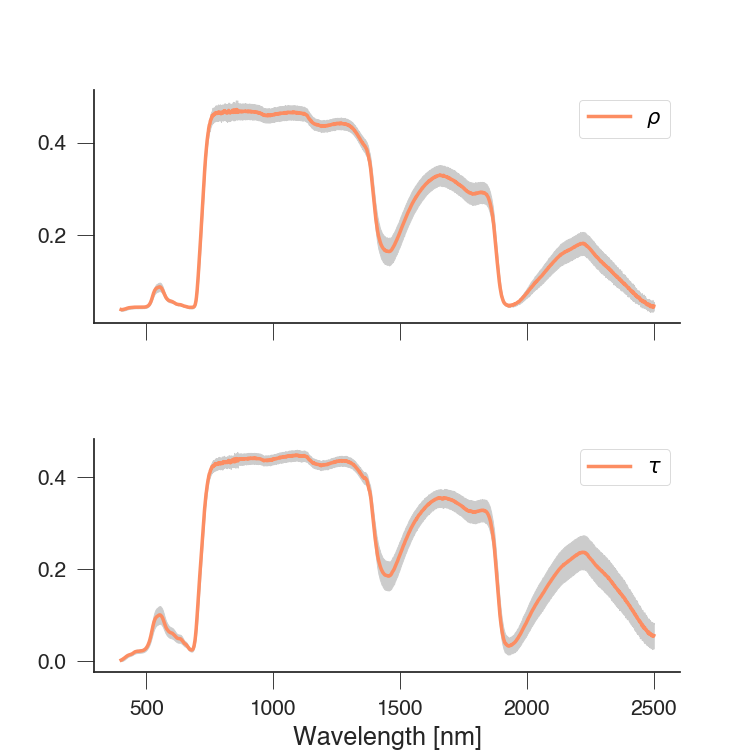

In [2]:
# Load data
rho, rho_unc, tau, tau_unc = read_lopex_sampe(5, do_plot=True)

<IPython.core.display.Javascript object>


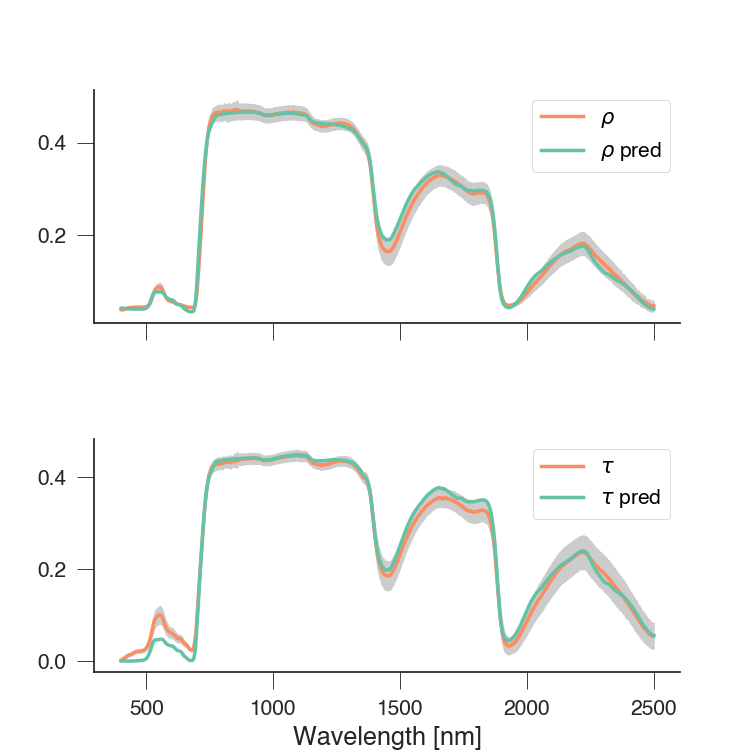

      fun: 3153.2405471715606
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.58432920e-01,   6.50288712e-03,  -5.45696821e-04,
        -4.27462510e-02,  -1.70034582e+00,   6.86300154e+00,
        -1.86446414e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 984
      nit: 105
   status: 0
  success: True
        x: array([  1.67842443e+00,   5.25459028e+01,   9.73339378e+00,
         1.01979385e-01,   9.34263398e-03,   9.49902851e-03,
         6.00733679e+00])


In [5]:
x0=np.array([2., 20., 10., 0.2, 0.015, 0.009, 8.])
retval = max_lklhood(x0, rho, rho_unc, tau, tau_unc, do_trans=False)
print retval

<IPython.core.display.Javascript object>


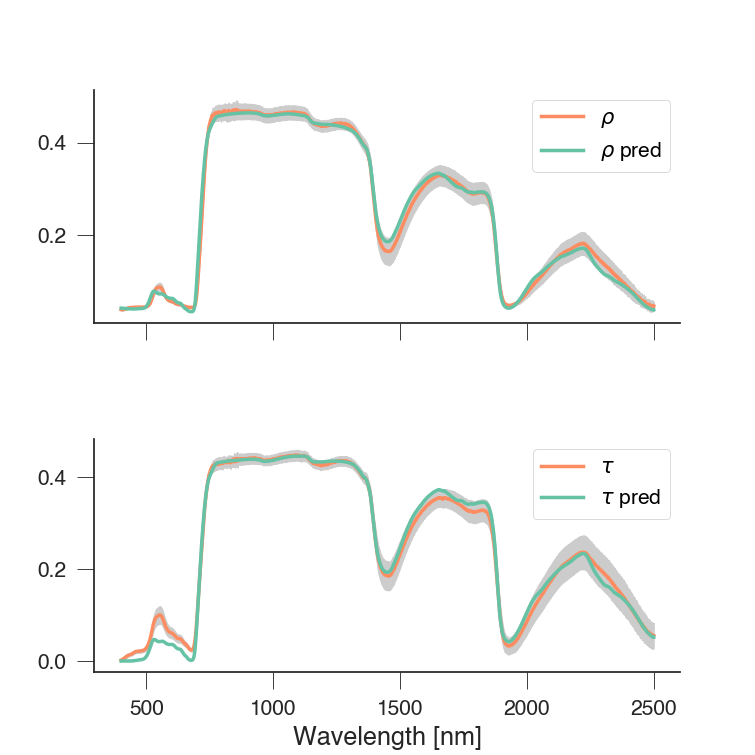

      fun: 12069.414585831648
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.93503797e+01,  -7.63975549e-02,  -9.27684596e-03,
         1.99348506e+01,  -9.79252945e+00,   8.29022611e+00,
        -1.10230758e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 840
      nit: 92
   status: 0
  success: True
        x: array([  1.68203549e+00,   4.75742050e+01,   4.86609753e+00,
         1.17218685e-01,   9.56661991e-03,   9.95835514e-03,
         7.81392092e+00])


In [7]:
x0=np.array([2., 20., 10., 0.2, 0.015, 0.009, 8.])
retval = max_lklhood(x0, rho, rho_unc, tau, tau_unc, do_trans=True)
print retval